# Исследование закономерностей, определяющих успешность игр интернет-магазина «Стримчик».

Цель: выявить потенциально популярный продукт и спланировать рекламные кампании

Мы располагаем данными с 1980 до 2016 года. Сюда входят данные с наименованием платформ игр, их годом выпуска, указана принадлежность к жанру, количество проданных копий, рейтинг пользователей и критиков, а также рейтинг ESRB.

**В рамках предобработки предстоит:**
- проанализировать данные
- изменить названия столбцов
- преобразовать тип данных
- обработать пропущенные значения в столбцах
- добавить данные с суммарными продажами во всех регионах 

**В рамках исследования предстоит:** 
- рассмотреть платформы с наибольшими показателями продаж
- определить актуальный период выпуска игр для построения анализа на 2017
- найти потенциально прибыльные платформы
- оценить влияние отзывов на продажи
- изучить популярные жанры
- выявить топовые платформы и жанры игр в зависимости от региона

Необходимо провести статистический анализ двух гипотез: проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, и жанров Action и Sports.



Данные содержат следующие признаки:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


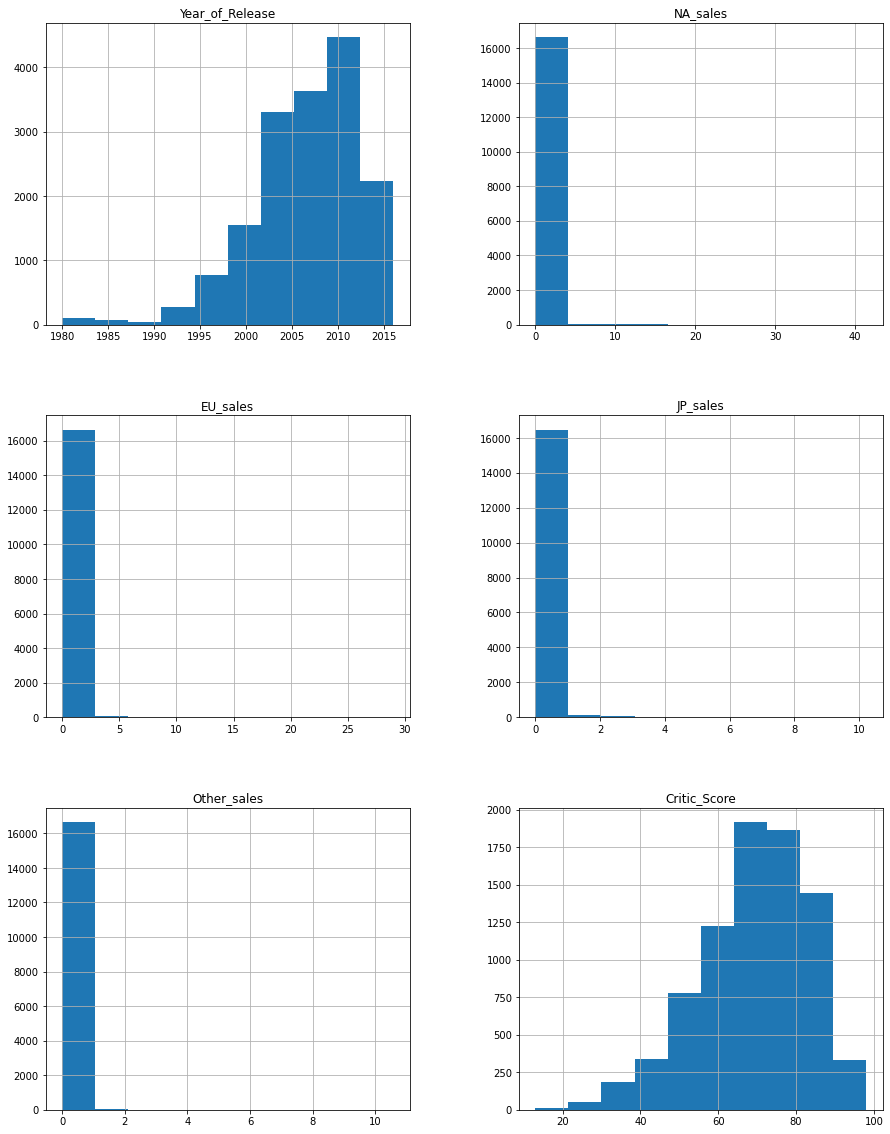

In [5]:
data_games.hist(figsize=(15, 20));

В датафрейме имеются столбцы с некорректными наименованиями, с пропущенными значениями, некоторые столбцы требуют изменения типа данных.

In [6]:
#проверим на наличие явных дубликатов
data_games.duplicated().unique()

array([False])

## Предобработка данных

###  Названия столбцов

In [7]:
#приведем все наименования к нижнему регистру
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типа данных в выбранных столбцах

In [8]:
#пропущенных значений около 300, восстановить их нет возможности, поэтому мы их удалим
data_games = data_games.dropna(subset=['year_of_release'])

In [9]:
# 'critic_score' имеет целочисленные значения, для преобразования типа заменим пустые ячейки на "-1" 
data_games['critic_score'] = data_games['critic_score'].fillna(-1)
data_games['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [10]:
data_games[['year_of_release', 'critic_score']] = data_games[['year_of_release', 'critic_score']].astype('int')

In [11]:
data_games['user_score'].unique()
# tbd - подлежит уточнению, поскольку уточнить мы не можем, поэтому заменим на "Nan"

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'] , errors='coerce')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [13]:
#поставим заглушку на пропущенные значения 'rating', поскольку этот рейтинг локальный
data_games['rating'] = data_games['rating'].fillna('Unknown')

### Пропущенные значения в столбцах

In [14]:
data_games['genre'].isna().sum()

2

In [15]:
#удалим пропущенные значения жанра, поскольку их мало
data_games = data_games.dropna(subset=['genre'])
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионах

In [16]:
#добавим столбец с суммой продаж во всех регионах
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

**Выводы:**

Предобработка обнаружила проблемы в данных:

- пропущенные значения,
- аномальные значения,
- неверные типы данных.

В столбце 'year_of_release' пропущенные значения простым способом не восставновить, их немного, поэтому они удалены.
В стоблце 'critic_score' пропущенные значения заменены на заглушку -1, чтобы не перекрыть 0 оценку и легко фильтровать при необходимости. Эти столбцы приведены к самому простому целочисленному значению.
В столбцах 'user_score' восстановить пропущенные значения не представляется возможным. Но поскольку их больше, чем 50%, удалить мы их не можем, они останутся nan. Так же есть значения "tbd", требующие уточнения, их мы тоже сделаем nan.
В столбце 'genre' всего два пропущенных значения, для нас роли не играют, их можно удалить.
Столбец 'rating' заполнен данными рейтинга ESRB. "Основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде." Отсюда пропуски в других регионах, на которые поставлена заглушка 'Unknown'.

К пропущенным значениям могли привести ошибки в исходных данных или отсутствие первоначальной информации. Отзывов до 1997 года практически нет, сфера компьютерных игр еще была не популярна и было слишком мало пользователей.

##  Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

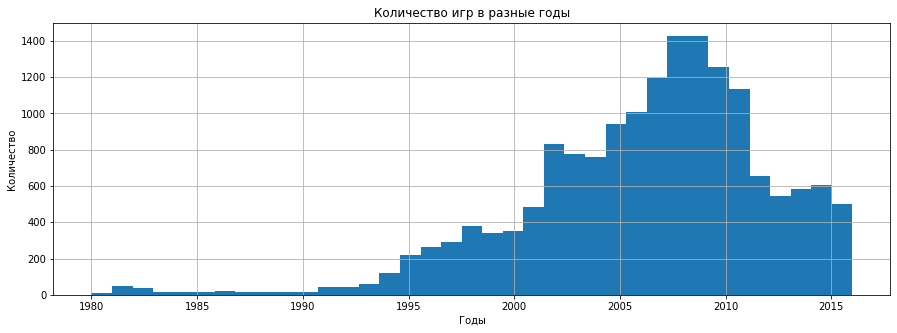

In [18]:
data_games['year_of_release'].hist(bins=37, figsize=(15,5));
plt.title('Количество игр в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество');

Основной пик приходится на 2010-2011 года. Возможно, это связано с активным ростом промышленности в этой области, а также с доступностью технического оснащения большой категории потребителей.

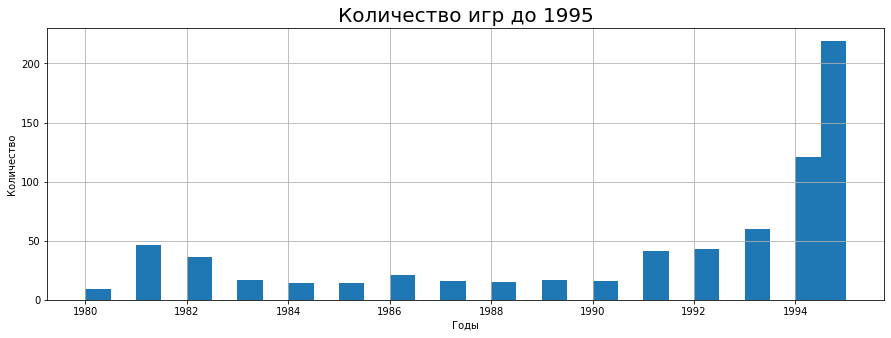

In [20]:
data_games['year_of_release'].hist(bins=30, figsize=(15,5), range = (1980,1995));
plt.title('Количество игр до 1995',fontsize=20)
plt.xlabel('Годы')
plt.ylabel('Количество');

До 1995 года количество продаваемых игр не представляет интерес. Сфера компьютерных игр еще была не популярна и предложений на рынке было мало.

### Как менялись продажи по платформам

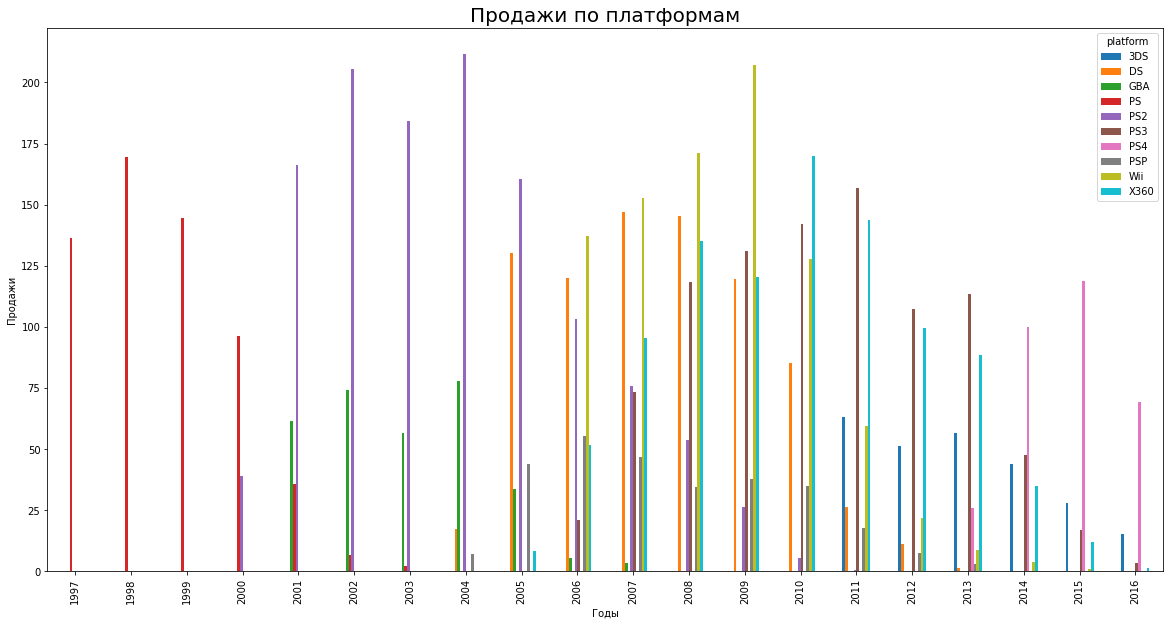

In [21]:
#график продаж по 10 наиболее покупаемым платформам
platform_top = data_games.groupby(by='platform')['total_sales'].sum().sort_values(ascending = False).head(10)
data_platform = (
    data_games.query('year_of_release > 1996 and platform in @platform_top.index')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(20,10))
)
plt.title('Продажи по платформам', fontsize=20)
plt.xlabel('Годы')
plt.ylabel('Продажи');

Как можно заметить в выборке наиболее популярных игр с 1996 года, покупаемость игр имеет некий жизненный цикл. В среднем жизнь игры с выхода на рынок до ухода с рынка составляет примерно 7-10 лет.

### Данные для прогноза на 2017 год

In [22]:
#выберем актуальный период с 2013 по 2016, где отражены наиболее актуальные тенденции для прогнозирования 2017 года.
data_actual = data_games.query('2013 < year_of_release <= 2016')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,NaN,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,Unknown,0.01


### Лидирующие платформы по продажам

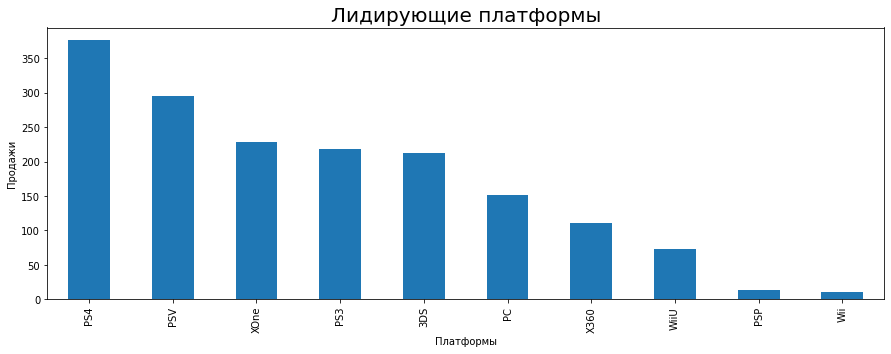

In [23]:
data_actual['platform'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title('Лидирующие платформы', fontsize=20)
plt.xlabel('Платформы')
plt.ylabel('Продажи');

In [24]:
data_actual['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Наибольшим спросом пользуются платформы игр: PS4, PSV, XOne, PS3, 3DS.

### Глобальные продажи игр в разбивке по платформам

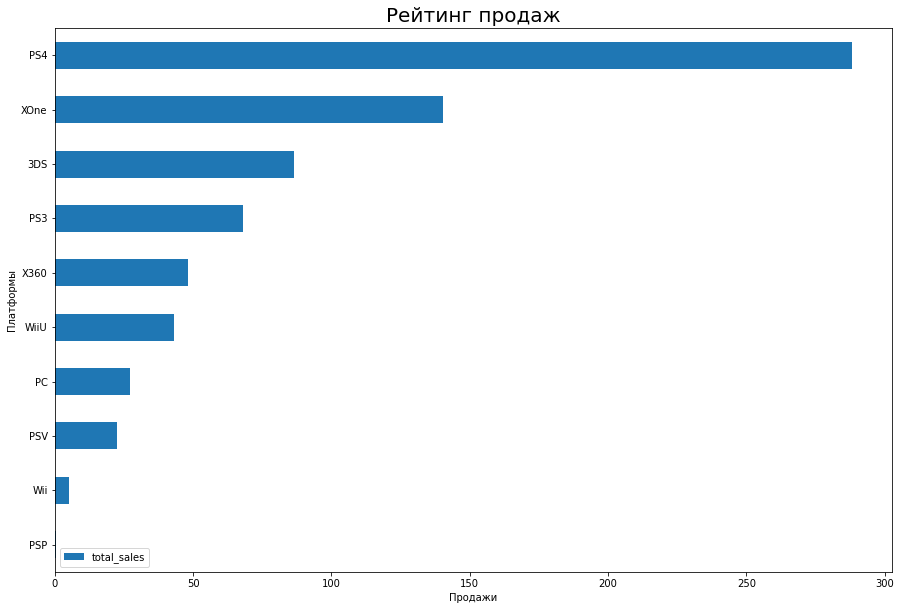

In [25]:
data_global_sales = (
    data_actual
    .pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
    .sort_values('total_sales')
)
data_global_sales.plot(kind='barh',figsize=(15,10))
plt.title('Рейтинг продаж', fontsize=20)
plt.xlabel('Продажи')
plt.ylabel('Платформы');

В рейтинге продаж лидирует платформа PS4 с существенным отрывом от остальных. Ниже расположились: XOne, 3DS, PS3, X360.  

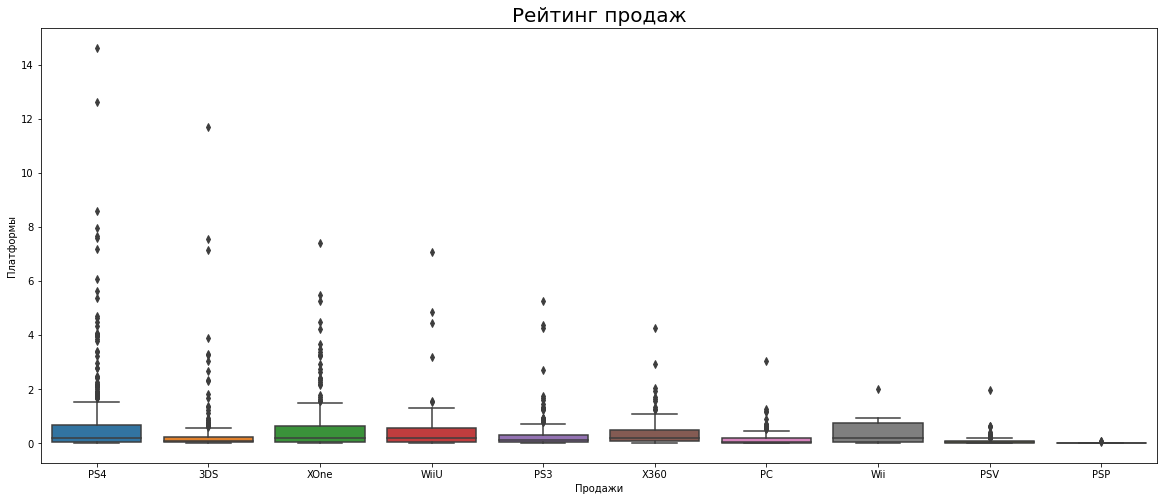

In [26]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_actual, x='platform', y='total_sales')

plt.title('Рейтинг продаж', fontsize=20)
plt.xlabel('Продажи')
plt.ylabel('Платформы');

No handles with labels found to put in legend.


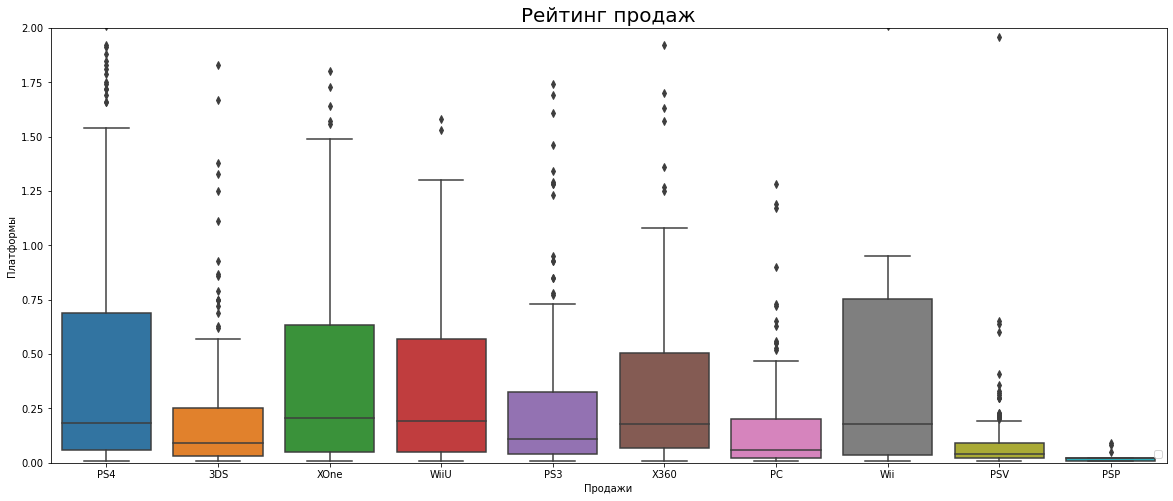

In [27]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_actual, x='platform', y='total_sales').set_ylim(0, 2)
plt.title('Рейтинг продаж', fontsize=20)
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.legend(loc='lower right');

Сильно отличаются медианы диаграмм от средних значений, максимальные значения уходят далеко за верхний квартиль, что говорит об экстремально высоких единичных значениях. Разброс продаж внутри платформ также сильно отличается между диаграммами. Данные не симметричны, есть значительный сдвиг вправо.

### Влияние на продажи отзывов пользователей и критиков

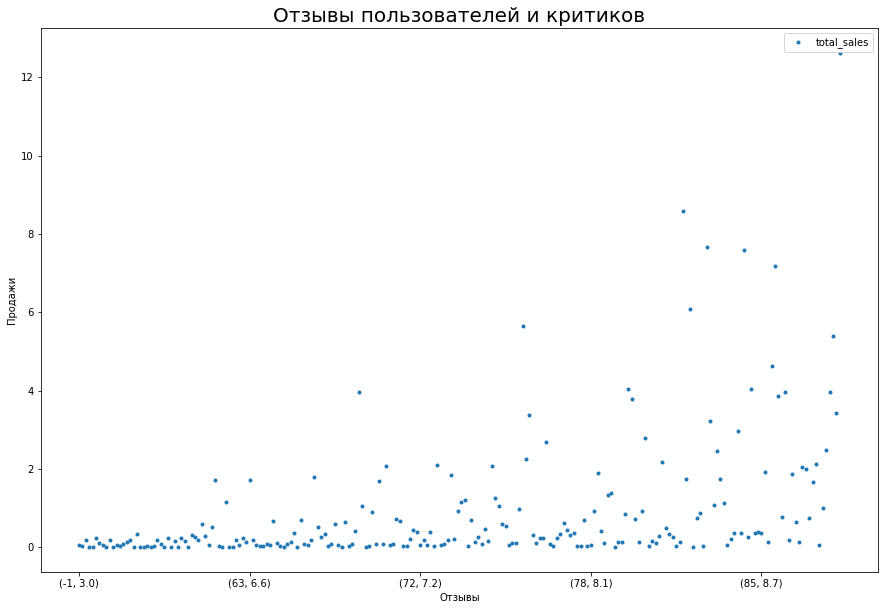

In [29]:
#построим диаграмму рассеяния для самой продающейся PS4
data_score_sales = data_actual.query('platform == "PS4"')
data_score = (
    data_score_sales
    .pivot_table(index=['critic_score', 'user_score'], values='total_sales')
    .plot(style='o',figsize=(15,10), markersize=3)    
)
plt.title('Отзывы пользователей и критиков', fontsize=20)
plt.xlabel('Отзывы')
plt.ylabel('Продажи');

Из графика видно влияние отзывов пользователей и критиков на продажи. Чем выше отклик, тем больше продаж.

In [30]:
#влияние оценки экспертов
data_score_sales['total_sales'].corr(data_score_sales['critic_score'])

0.2108468533672136

Коэффициент корреляции говорит о слабой линейной зависимости от отзывов критиков.

In [31]:
#влияние оценки пользователей
data_score_sales['total_sales'].corr(data_score_sales['user_score'])

-0.040131589472697356

Коэффициент корреляции говорит о незначительной обратной линейной зависимости от отзывов пользователей.

### Продажи игр на других платформах

In [32]:
data_games_list = data_actual.platform.unique()

In [33]:
for platform in data_games_list:
    data_score_sales_critic_score = data_actual.query('critic_score > 0 & platform == @platform')
    print(
        'Корреляция (оценка экспертов) по платформе', platform,
        data_score_sales_critic_score['total_sales'].corr(
            data_score_sales_critic_score['critic_score']
        )
    )

Корреляция (оценка экспертов) по платформе PS4 0.40266141068104083
Корреляция (оценка экспертов) по платформе 3DS 0.31411749286905105
Корреляция (оценка экспертов) по платформе XOne 0.42867694370333226
Корреляция (оценка экспертов) по платформе WiiU 0.370201412480884
Корреляция (оценка экспертов) по платформе PS3 0.44657460493190704
Корреляция (оценка экспертов) по платформе X360 0.5257228356581523
Корреляция (оценка экспертов) по платформе PC 0.17463413769350036
Корреляция (оценка экспертов) по платформе Wii nan
Корреляция (оценка экспертов) по платформе PSV 0.04266490657009526
Корреляция (оценка экспертов) по платформе PSP nan


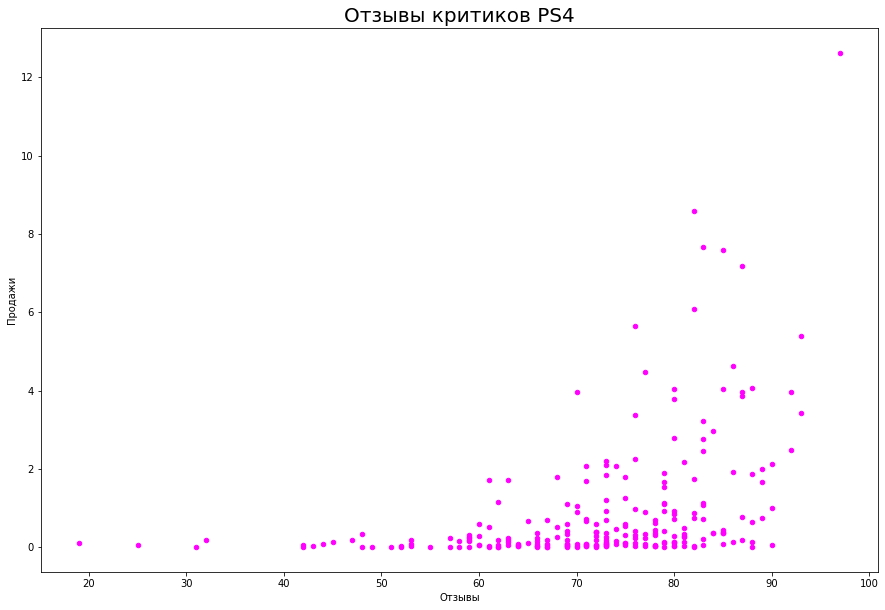

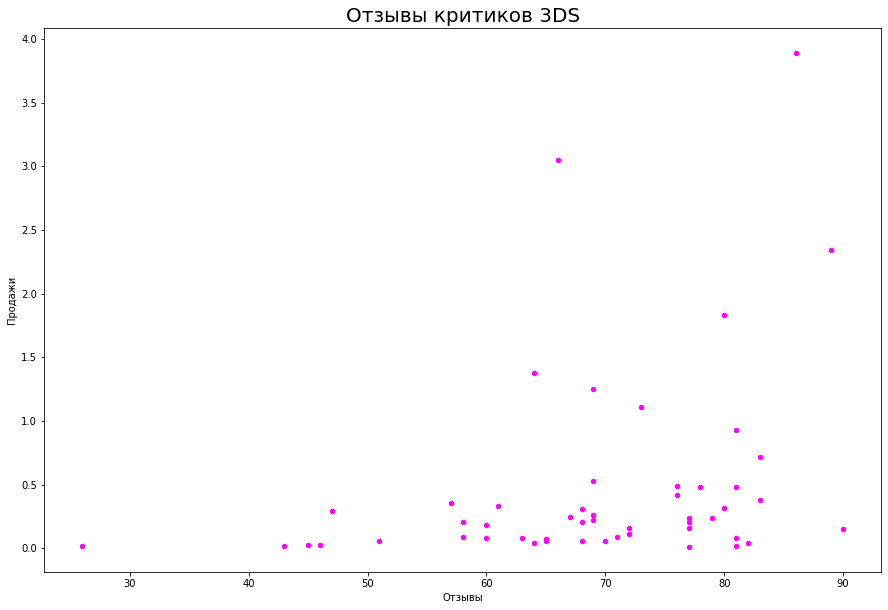

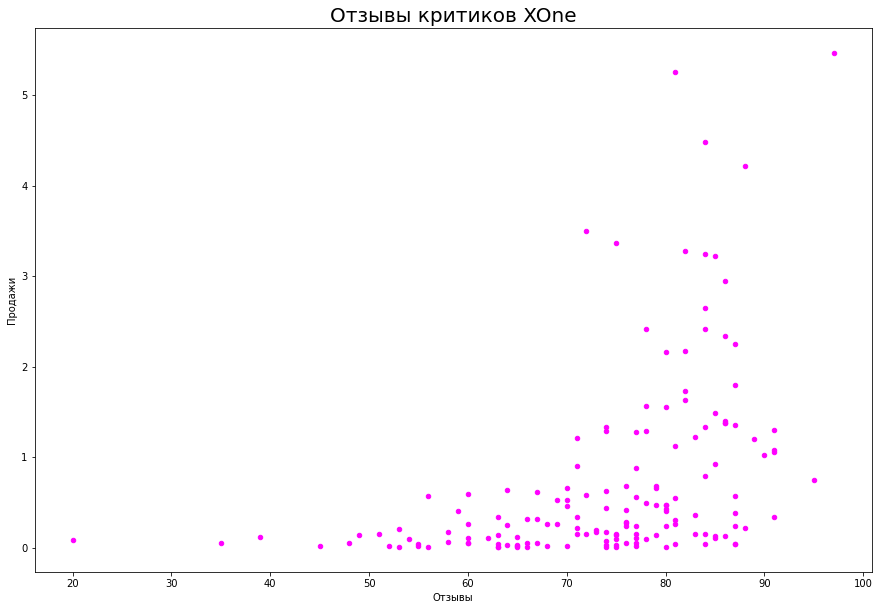

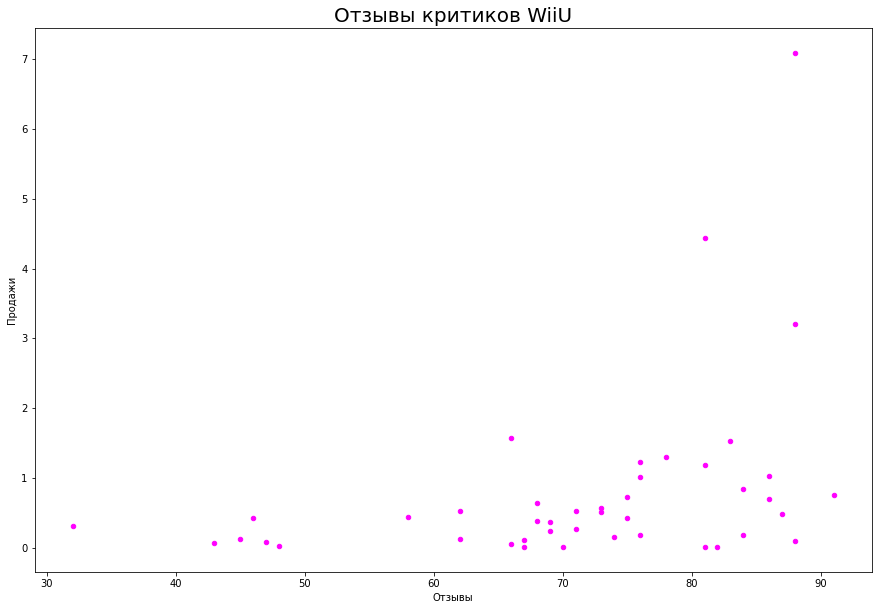

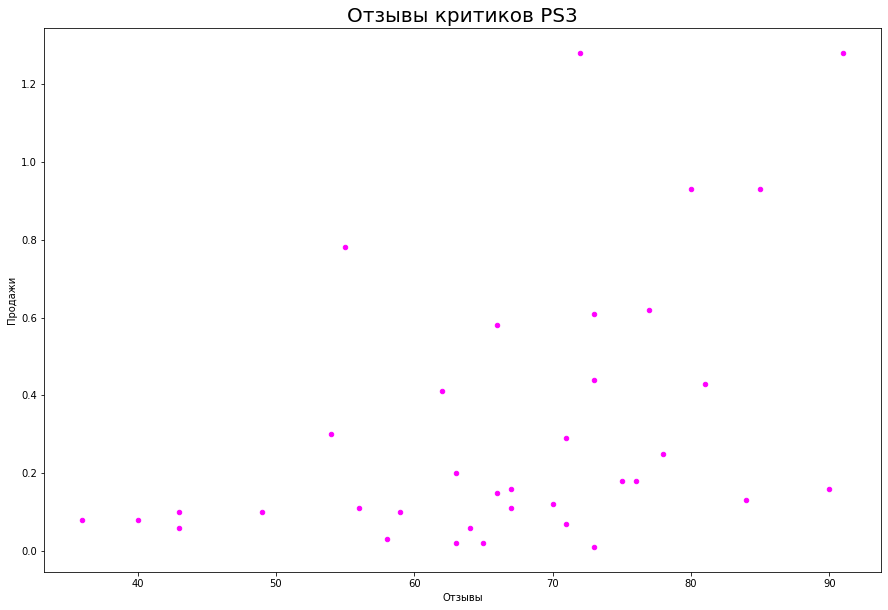

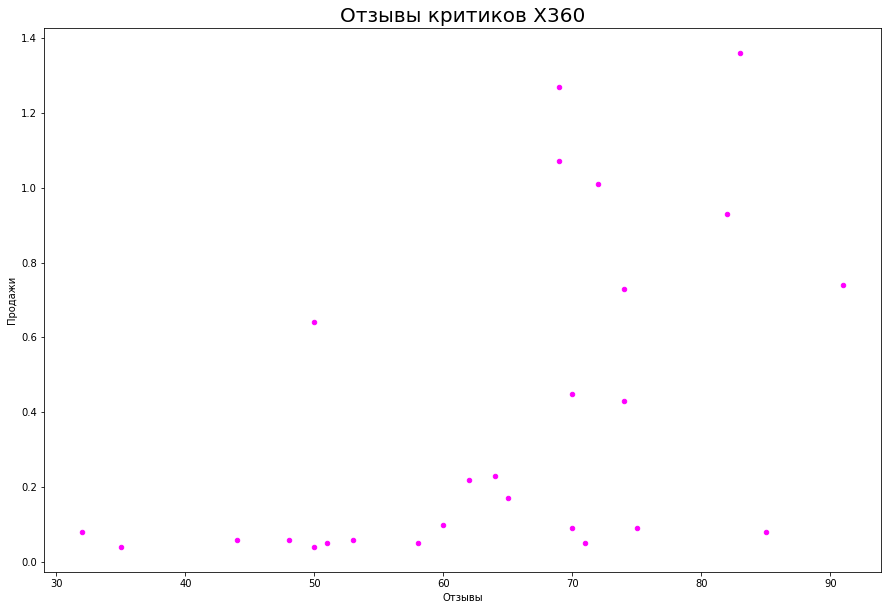

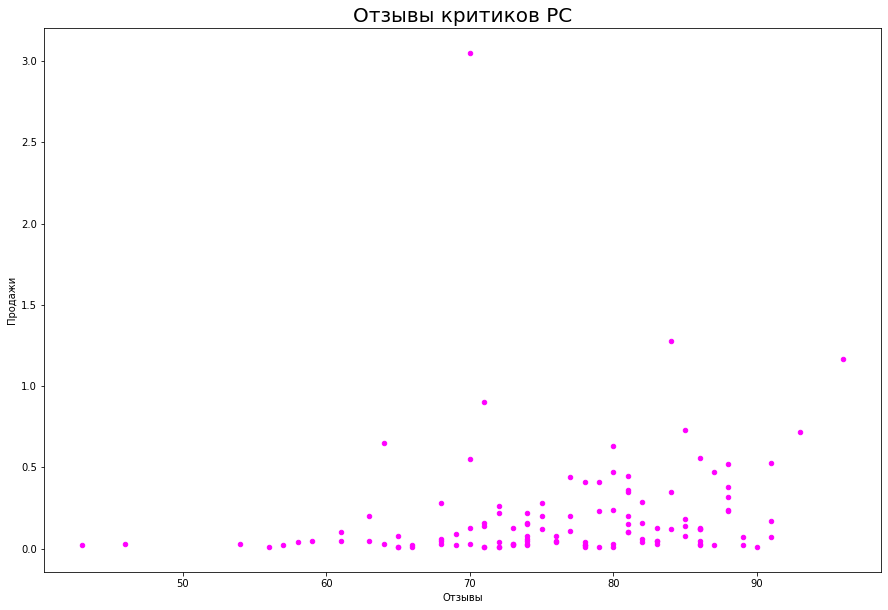

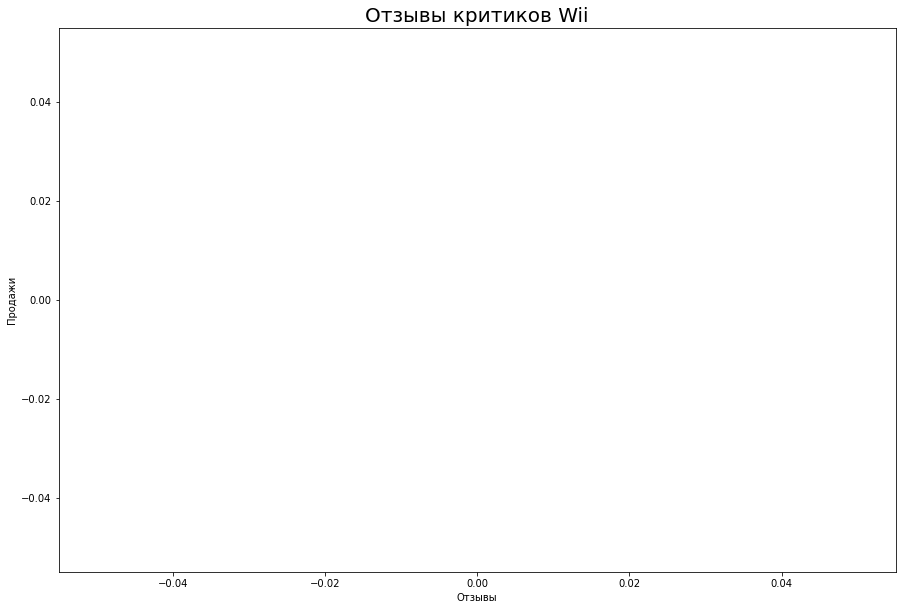

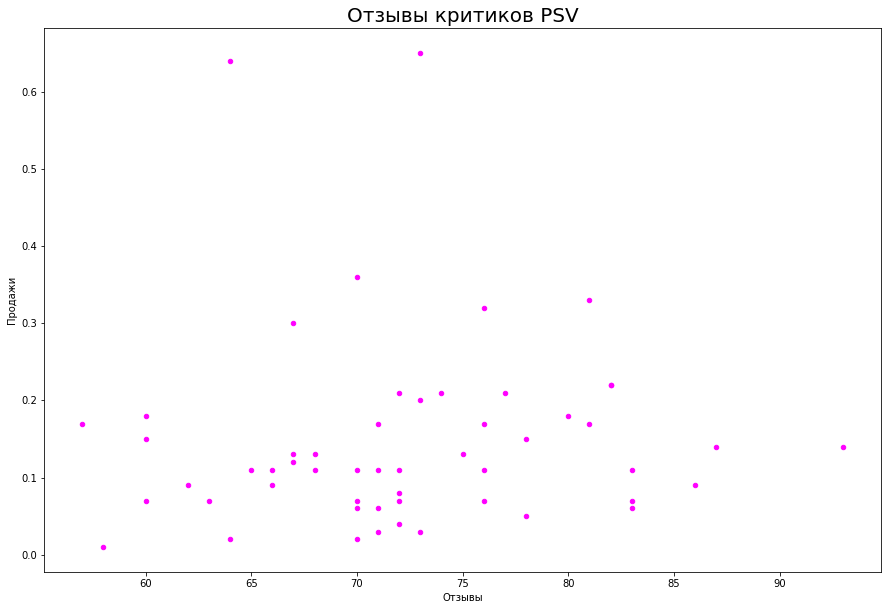

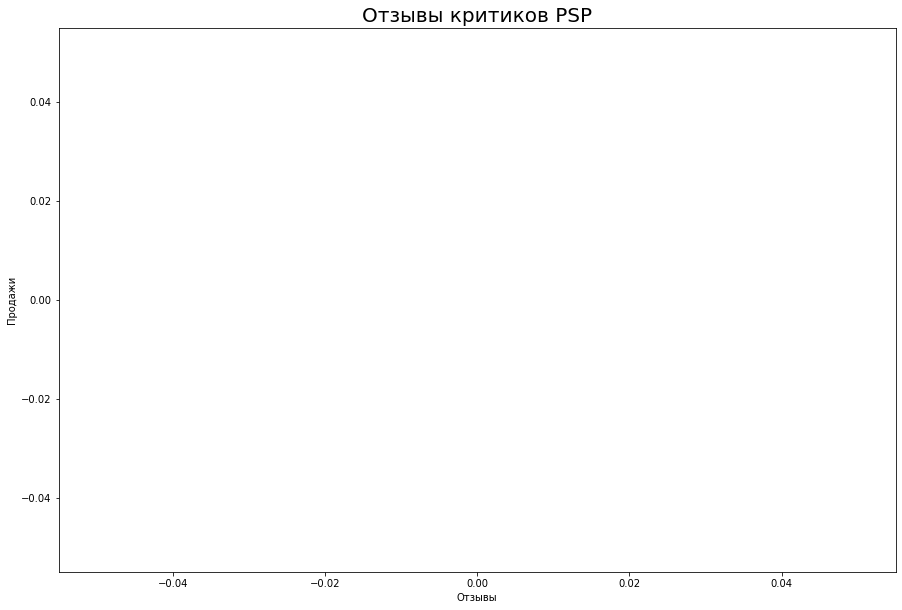

In [34]:
for platform in data_games_list:
    data_score_sales_another = data_actual.query('critic_score > 0 & platform == @platform')
    data_score_sales_another['total_sales'].corr(data_score_sales_another['critic_score'])
    data_score_sales_another.plot(x='critic_score',y='total_sales', color='magenta', kind='scatter',figsize=(15,10))
    plt.title('Отзывы критиков {}'.format(platform), fontsize=20)
    plt.xlabel('Отзывы')
    plt.ylabel('Продажи');
    

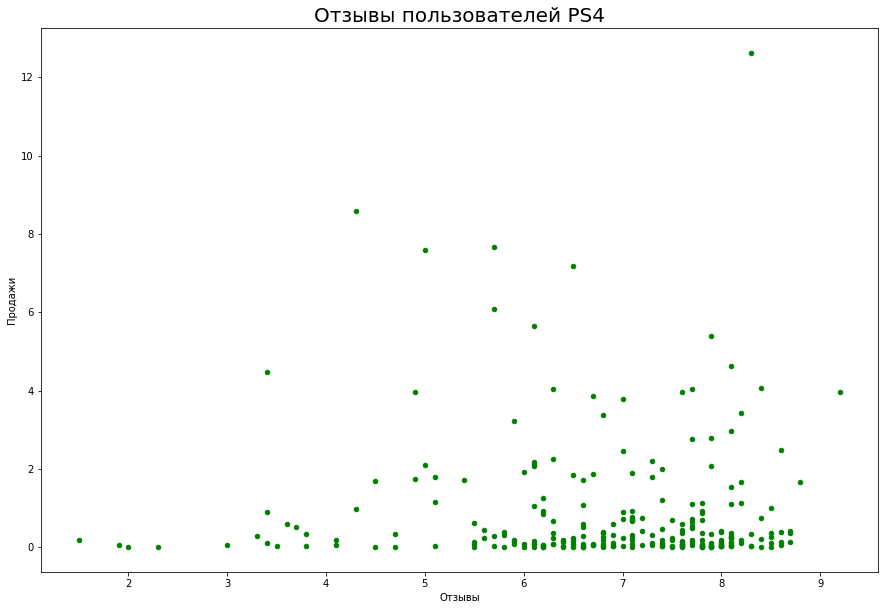

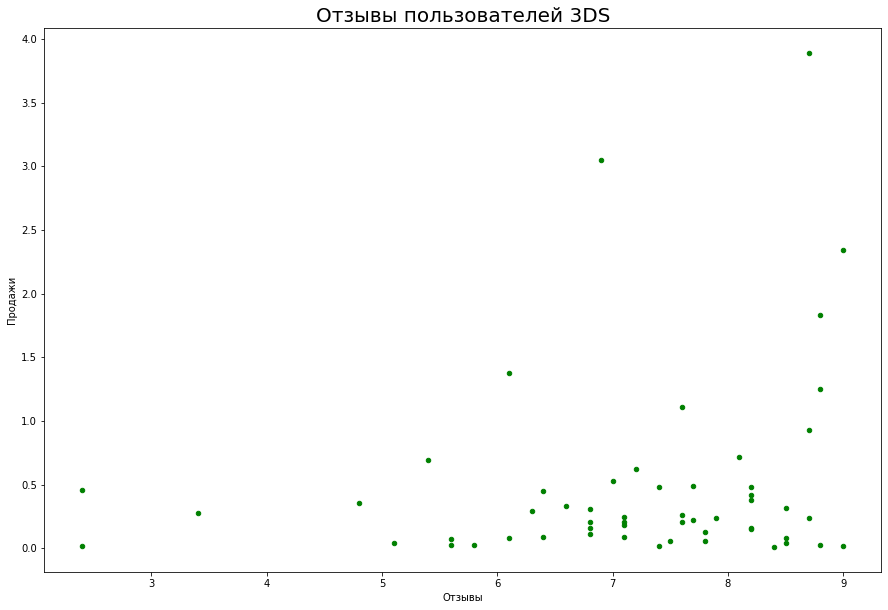

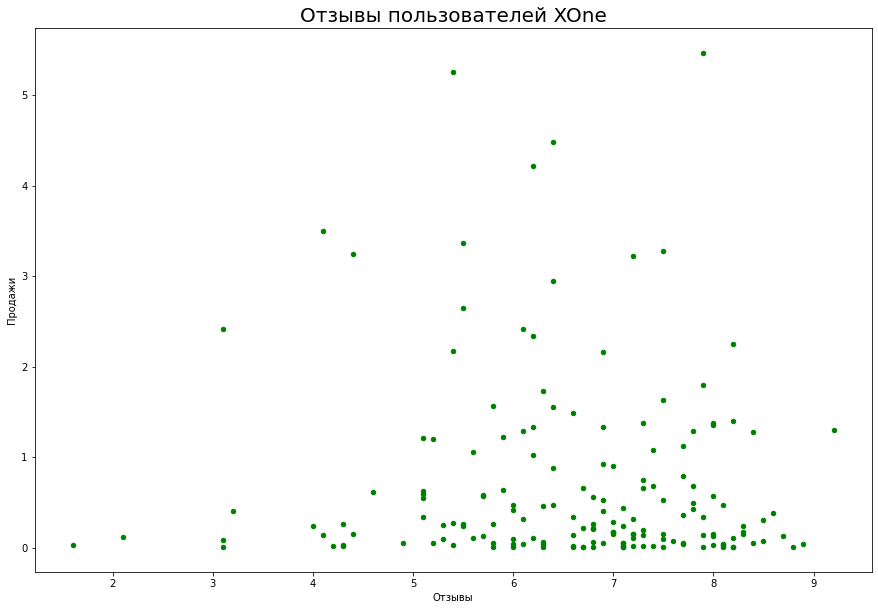

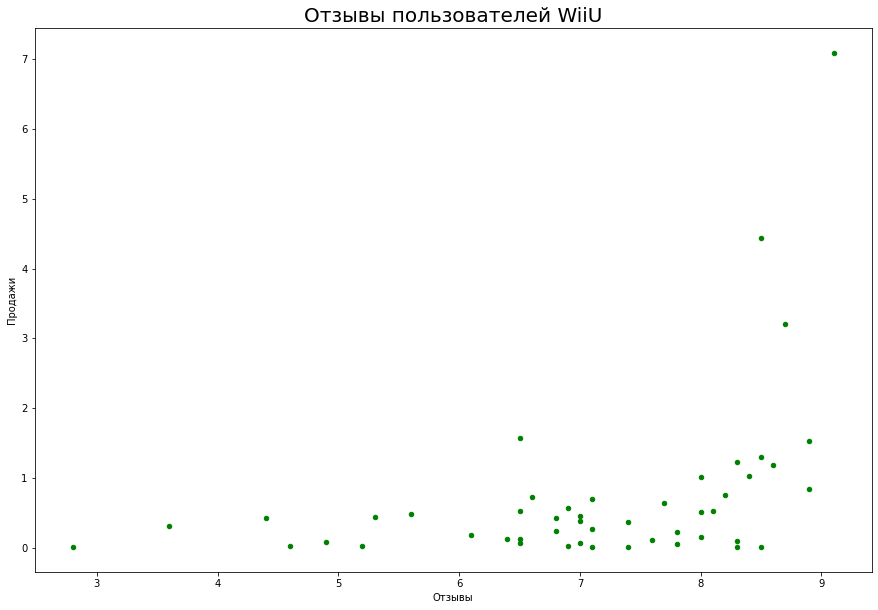

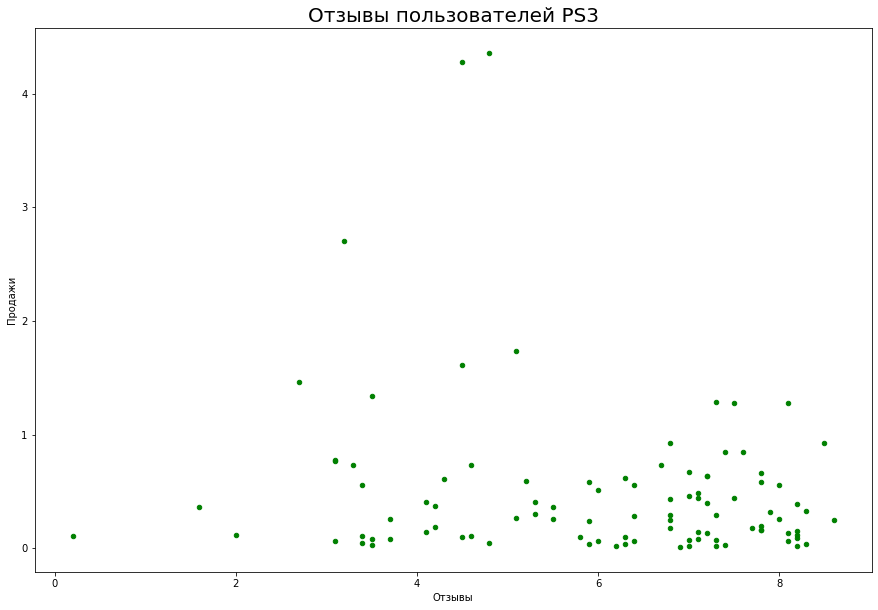

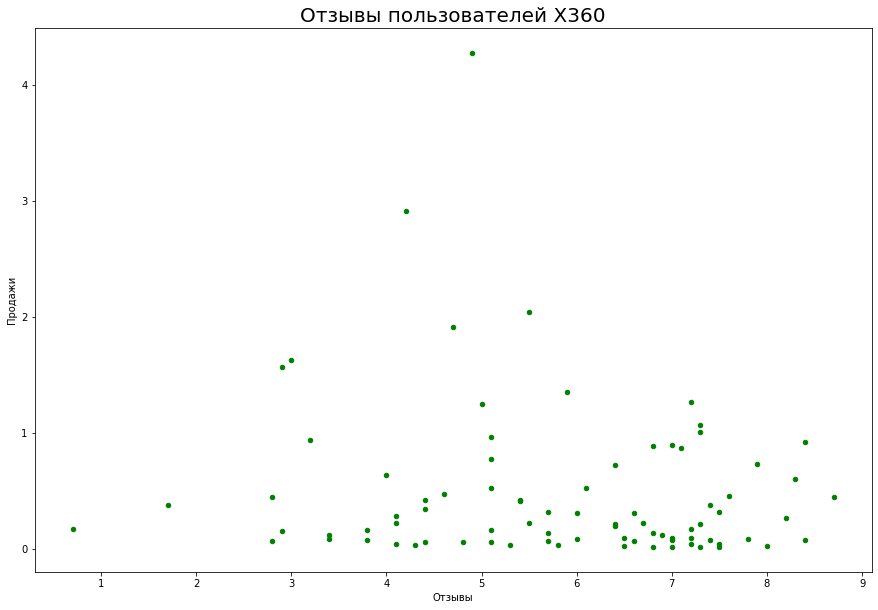

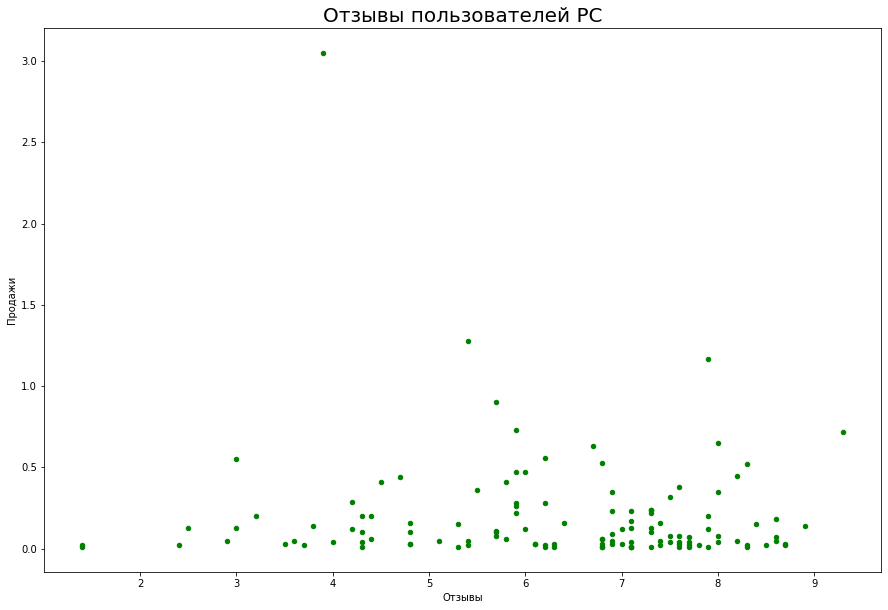

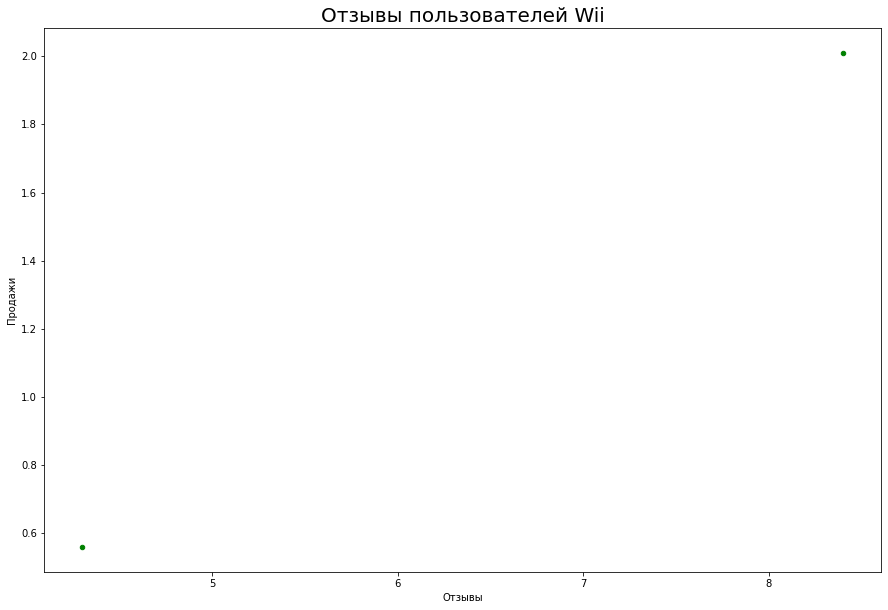

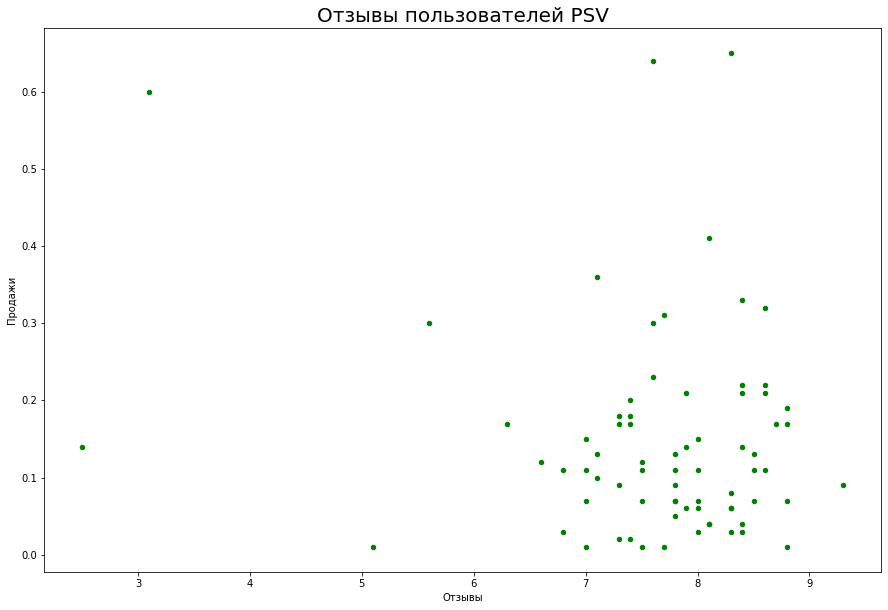

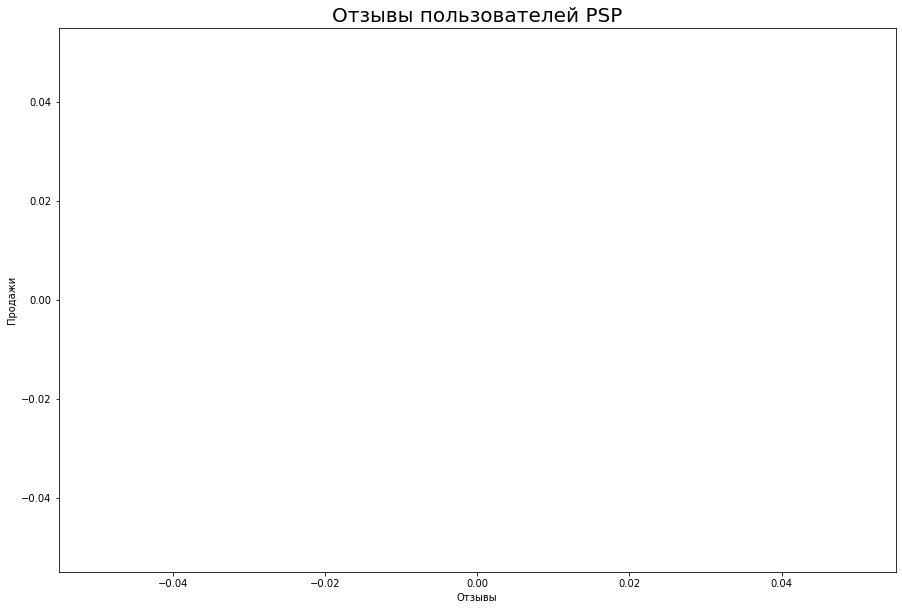

In [35]:
for platform in data_games_list:
    data_actual.query('platform == @platform').plot(x='user_score',y='total_sales', color='green',kind='scatter',figsize=(15,10)) 
    plt.title('Отзывы пользователей {}'.format(platform), fontsize=20)
    plt.xlabel('Отзывы')
    plt.ylabel('Продажи');

In [36]:
for platform in data_games_list:
    data_score_sales_user_score = data_actual.query('platform == @platform')
    print(
        'Корреляция (оценка экспертов) по платформе', platform,
        data_score_sales_user_score['total_sales'].corr(
            data_score_sales_user_score['user_score']
        )
    )

Корреляция (оценка экспертов) по платформе PS4 -0.040131589472697356
Корреляция (оценка экспертов) по платформе 3DS 0.2151932718527028
Корреляция (оценка экспертов) по платформе XOne -0.0703839280647581
Корреляция (оценка экспертов) по платформе WiiU 0.4079264579217078
Корреляция (оценка экспертов) по платформе PS3 -0.16676141347662116
Корреляция (оценка экспертов) по платформе X360 -0.138444570945665
Корреляция (оценка экспертов) по платформе PC -0.07159665703472452
Корреляция (оценка экспертов) по платформе Wii 1.0
Корреляция (оценка экспертов) по платформе PSV -0.16845504978064446
Корреляция (оценка экспертов) по платформе PSP nan


На других платформах так же наблюдается взаимосвязь между продажами и отзывами. Чем выше отклик, тем больше продаж.

###  Общее распределение игр по жанрам

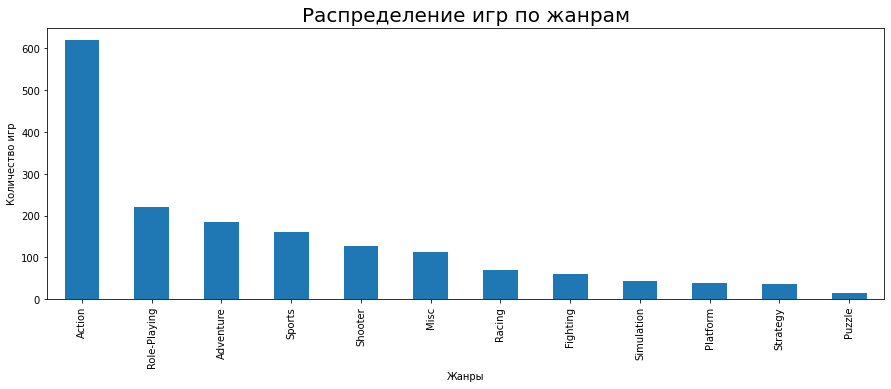

In [37]:
data_actual['genre'].value_counts().plot(kind='bar', figsize = (15,5))
plt.title('Распределение игр по жанрам', fontsize=20)
plt.xlabel('Жанры')
plt.ylabel('Количество игр');

In [38]:
data_actual['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Больше всего на рынке игр с жанрами: Action, Role-Playing, Adventure, Sports, Shooter.

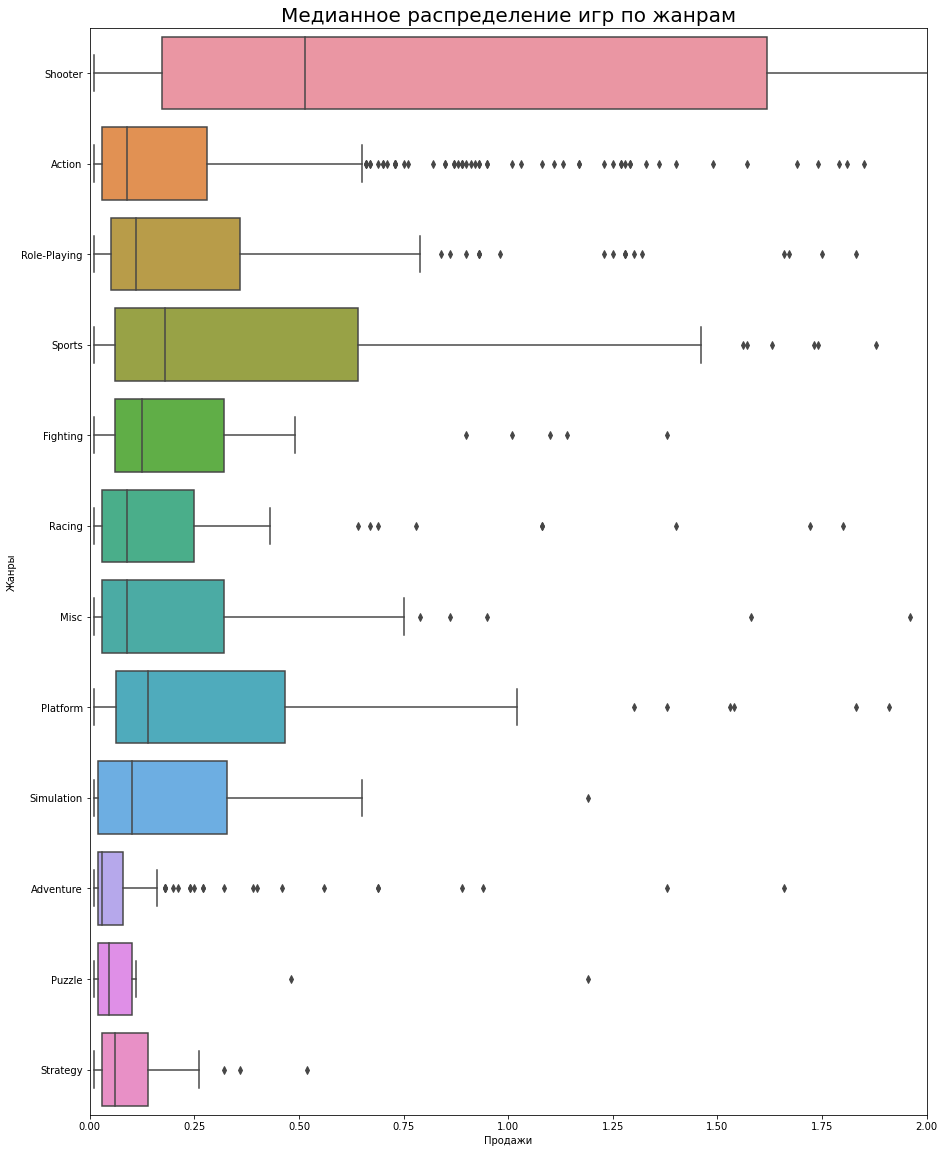

In [39]:
data_games_genre = data_actual[['genre','total_sales']]
plt.figure(figsize=(15,20))
sns.boxplot(data=data_games_genre, x='total_sales', y='genre').set_xlim(0, 2)
plt.title('Медианное распределение игр по жанрам', fontsize=20)
plt.xlabel('Продажи')
plt.ylabel('Жанры');

Самые прибыльные игры оказались в жанре Shooter.

## Портрет пользователя каждого региона

### Популярные платформы (топ-5)

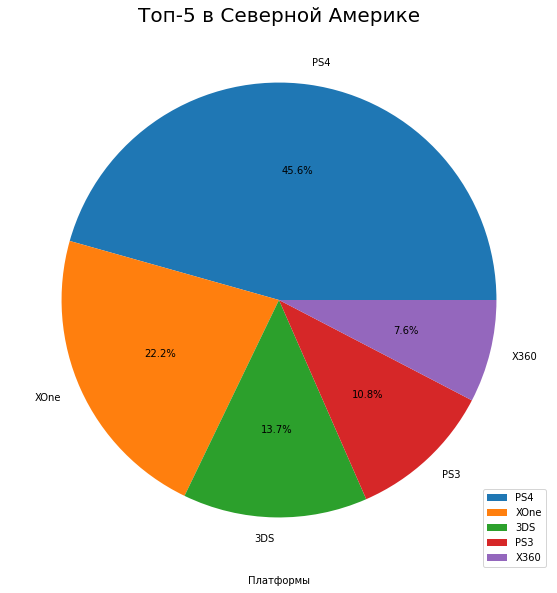

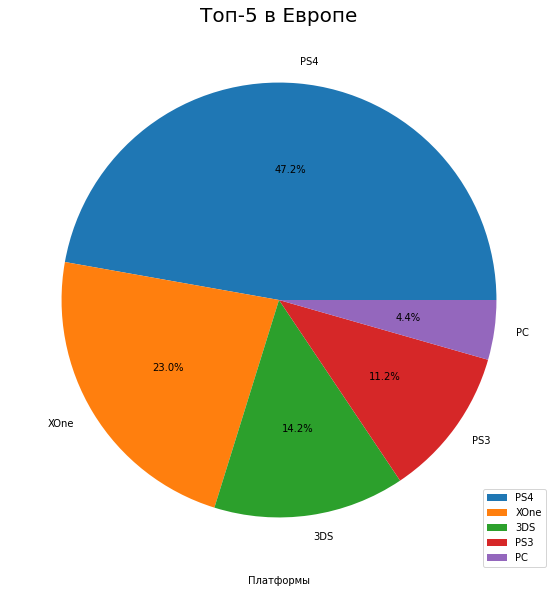

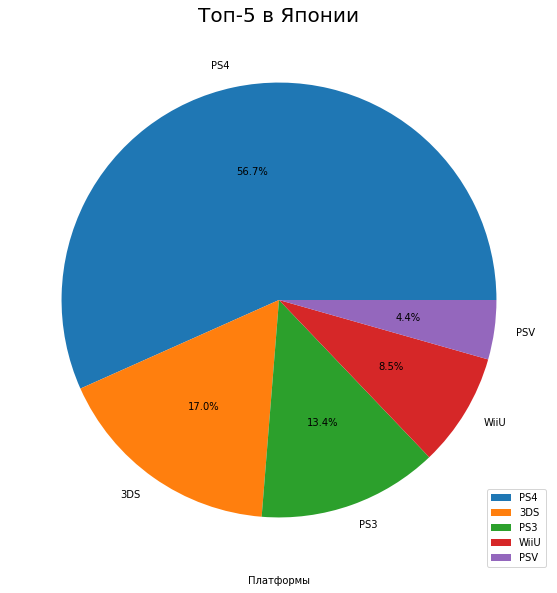

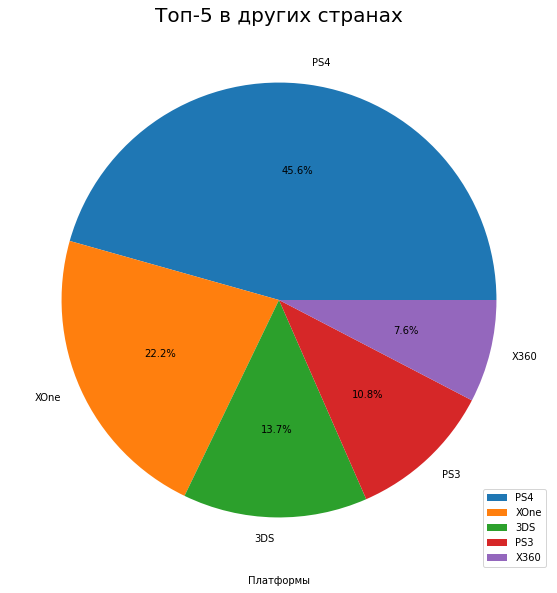

In [40]:
region_list = data_games.columns[4:8]

def popular_platform(region):
    games_top_region = data_actual.groupby(by='platform')[region].sum().sort_values(ascending = False).head()
    data_platform = (
        data_actual.query('platform in @games_top_region.index')
        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', ascending = False)
        .plot(y='total_sales', kind='pie', figsize=(15,10), autopct='%1.1f%%')

    )
    
    plt.xlabel('Платформы')
    plt.ylabel('')
    plt.legend(loc='lower right')
    
    if region == 'na_sales':
        plt.title('Топ-5 в Северной Америке', fontsize=20)
    elif region == 'eu_sales':
        plt.title('Топ-5 в Европе', fontsize=20)
    elif region == 'jp_sales':
        plt.title('Топ-5 в Японии', fontsize=20)
    else:
        plt.title('Топ-5 в других странах', fontsize=20)

for region in region_list:
    popular_platform(region)
    

Предпочтения разных регионов сошлись на лидере PS4 с существенным отрывом от остальных. Ниже расположились: XOne, 3DS, PS3. А вот в Японии немного другие предпочтения после PS4: 3DS, PS3.

### Популярные жанры (топ-5)

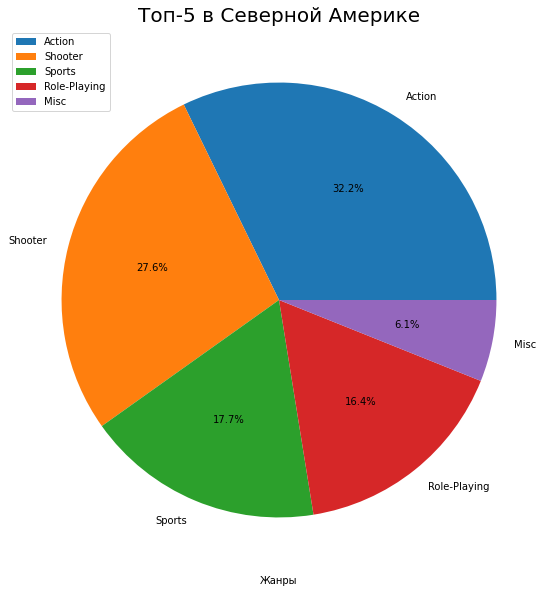

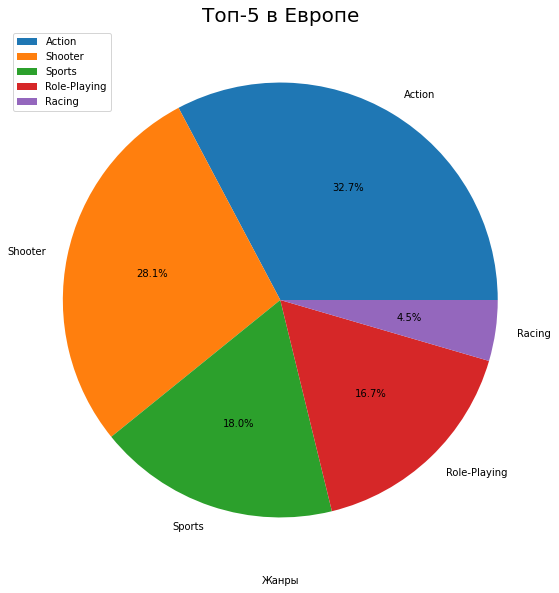

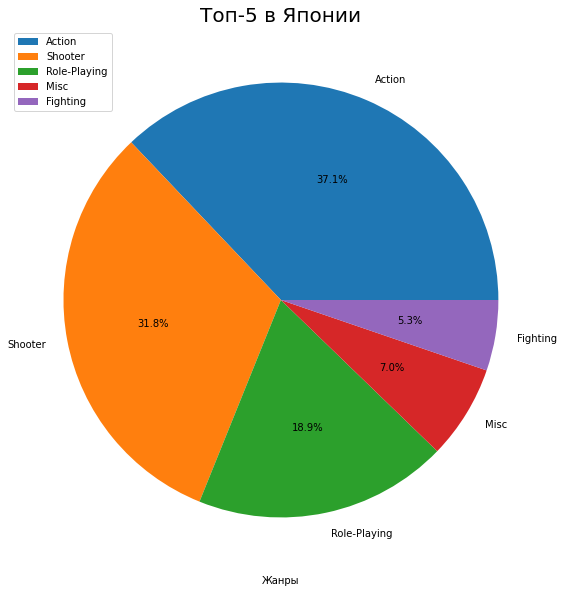

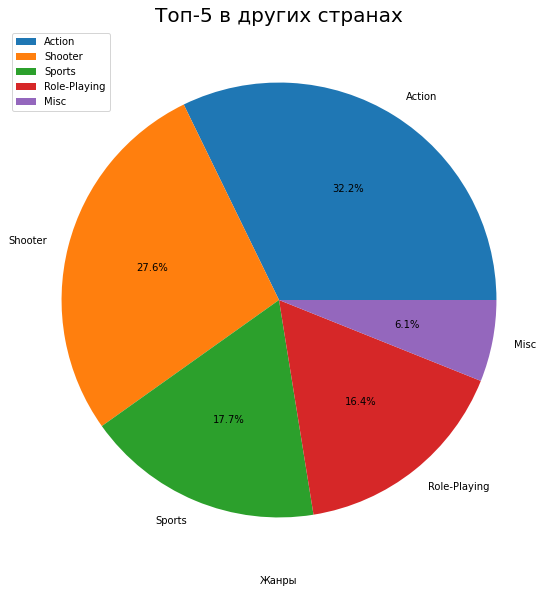

In [41]:
def popular_genre(region):
    genres_top_region = data_actual.groupby(by='genre')[region].sum().sort_values(ascending = False).head()
    data_genre = (
        data_actual.query('genre in @genres_top_region.index')
        .pivot_table(index='genre', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', ascending = False)
        .plot(y='total_sales', kind='pie', figsize=(15,10), autopct='%1.1f%%')

    )
    
    plt.xlabel('Жанры')
    plt.ylabel('')
    plt.legend(loc='upper left')
    
    if region == 'na_sales':
        plt.title('Топ-5 в Северной Америке', fontsize=20)
    elif region == 'eu_sales':
        plt.title('Топ-5 в Европе', fontsize=20)
    elif region == 'jp_sales':
        plt.title('Топ-5 в Японии', fontsize=20)
    else:
        plt.title('Топ-5 в других странах', fontsize=20)

for region in region_list:
    popular_genre(region)

Выбор жанра большинством пользователей пал на жанр Action.

### Влияние рейтинга ESRB на продажи

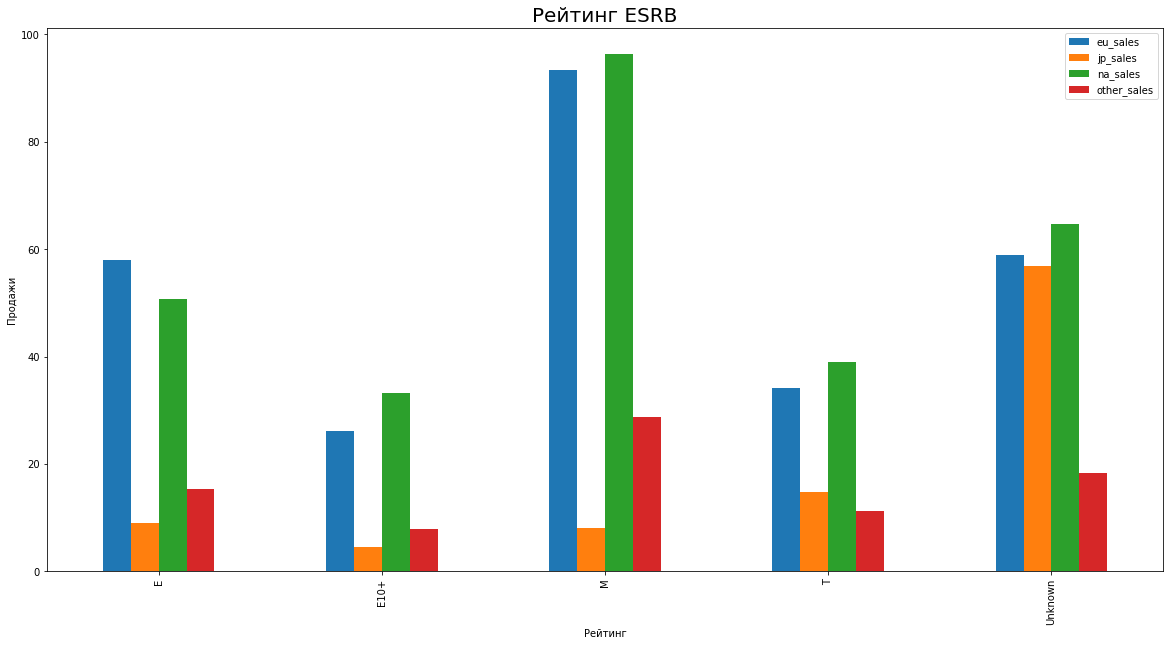

In [42]:
data_platform = (
    data_actual
    .pivot_table(index='rating', values=region_list, aggfunc='sum')
    .plot(kind='bar', figsize=(20,10))
)
plt.title('Рейтинг ESRB', fontsize=20)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи');

In [43]:
# Комментарий ревьюера
temp = data_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


Unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

Отчетливо видно влияние рейтинга ESRB на продажи в Северной Америке и Европе. Другие регионы не оцениваются этим рейтингом, поэтому и влияние на продажи незначительное. Но на продажи в категории 'Unknown' оказывают влияние на рост другие показатели. Что требует дополнительного изучения и больше входных данных.

## Проверка гипотез

In [44]:
from scipy import stats as st

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги платформы Xbox One = средние пользовательские рейтинги платформы PC \
Н1: Средние пользовательские рейтинги платформы Xbox One ≠ средние пользовательские рейтинги платформы PC

In [45]:
#  вызов метода для проверки гипотезы
rating_platform_xone = data_actual.query('platform == "XOne" and user_score > 0')['user_score']
rating_platform_pc = data_actual.query('platform == "PC" and user_score > 0')['user_score']

results = st.ttest_ind(
    rating_platform_xone,
    rating_platform_pc,
    equal_var=False
)


alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформы Xbox One не отличаются от средних пользовательских рейтингов платформы PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports \
Н1: Средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанра Sports

In [46]:
#  вызов метода для проверки гипотезы
rating_genre_action = data_actual.query('genre == "Action" and user_score > 0')['user_score']
rating_genre_sports = data_actual.query('genre == "Sports" and user_score > 0')['user_score']

results = st.ttest_ind(
    rating_genre_action,
    rating_genre_sports,
    equal_var=False
)


alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-значение намного меньше заданного уровня значимости в 5%, это является основанием отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

**Вывод:** Обе нулевые гипотезы выбраны из соображений одинаковости выборок. Альтернативные гипотезы выбраны с отклонением в обе стороны от средней. Проверка первой гипотезы показала, что распределения совпадают, отвергнуть гипотезу не удалось. Во второй гипотезе отвергнута нулевая гипотеза, поскольку уровень значимости оказался меньше допустимого. 
Для анализа выбран двусторонний t-тест Стьюдента, так как выбранное отклонение может происходить в обе стороны от средней.

##  Общий вывод

Мы рассмотрели данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с 1980 до 2016 года.


В ходе проекта:

- провели анализ данных о продажах
- изучили зависимости в продажах от платформы и жанра
- определили актуальный период выпуска игр для построения анализа на 2017
- оценили корреляции рейтингов пользователей и экспертов и коммерческого успеха игры
- выявили особенности региональных продаж и предпочтений (Северная Америка, Европа, Япония и др.)
- проверили гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, и жанров Action и Sports

Основной пик продаж наблюдается в 2010-2011 года. В среднем жизнь игры с выхода на рынок до ухода с рынка составляет примерно 7-10 лет. За актуальный был выбран период исследования 2013-2016 г.\
Наиболее популярными оказались платформы: PS4, PSV, XOne, PS3, 3DS. В рейтинге продаж лидирует платформа PS4.\
Выявлена взаимосвязь между продажами и отзывами. Чем выше отклик, тем больше продаж. Начиная с 60 баллов у экспертов и 6 баллов у пользователей увеличивается рост продаж.\
Большинство пользователей увлекаются жанром Action и Shooter.

Проверка гипотез показала, что средние пользовательские рейтинги платформы Xbox One не отличаются от средних пользовательских рейтингов платформы PC.
Средние пользовательские рейтинги жанра Action и средние пользовательские рейтинги жанра Sports неодинаковые.

По результатам исследования наиболее перспективными представляются платформы PS4 и XOne. Большим спросом пользуются жанры  Shooter и Action. При выборе игр следует обратить внимание на отзывы критиков. Можно ориентироваться на рейтинг ESRB "М" (для взрослых).